<a href="https://colab.research.google.com/github/jungihong10/LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LSTM/preprocessed_data.csv')
# Separate input features and output labels
X = data.drop('Status', axis=1)
y = data['Status']

In [ ]:
# Scale input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)

loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")



Epoch 1/100
225/225 [==============================] - 6s 9ms/step - loss: 0.4946 - accuracy: 0.7875 - val_loss: 0.2685 - val_accuracy: 0.9488
Epoch 2/100
225/225 [==============================] - 1s 5ms/step - loss: 0.2068 - accuracy: 0.9341 - val_loss: 0.1181 - val_accuracy: 0.9475
Epoch 3/100
225/225 [==============================] - 1s 6ms/step - loss: 0.1144 - accuracy: 0.9573 - val_loss: 0.0770 - val_accuracy: 0.9712
Epoch 4/100
225/225 [==============================] - 2s 7ms/step - loss: 0.0806 - accuracy: 0.9683 - val_loss: 0.0583 - val_accuracy: 0.9712
Epoch 5/100
225/225 [==============================] - 2s 8ms/step - loss: 0.0630 - accuracy: 0.9758 - val_loss: 0.0435 - val_accuracy: 0.9712
Epoch 6/100
225/225 [==============================] - 1s 6ms/step - loss: 0.0498 - accuracy: 0.9830 - val_loss: 0.0351 - val_accuracy: 0.9737
Epoch 7/100
225/225 [==============================] - 1s 5ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0237 - val_accuracy: 1.0000

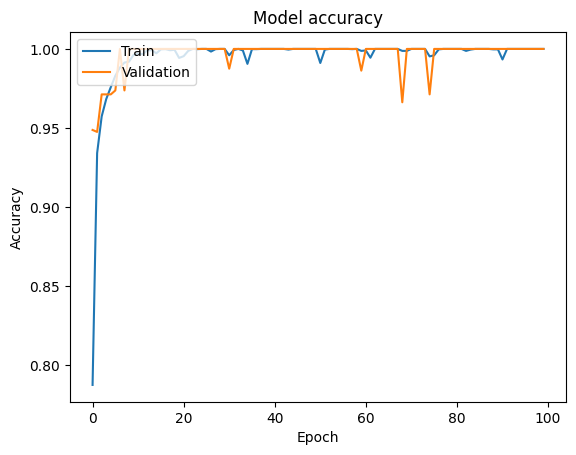

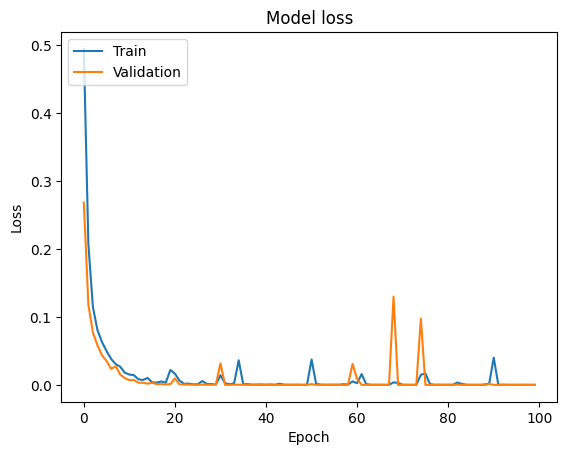

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

63/63 [==============================] - 0s 3ms/step


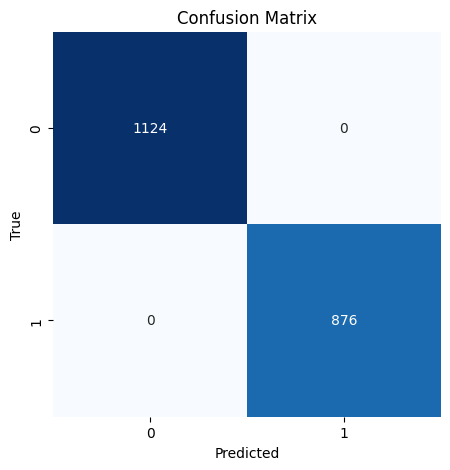

In [ ]:
# Get the confusion matrix
y_pred = (model.predict(X_test) > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()